In [9]:
import numpy as np
data = np.load('Efavg_v2.npz')
print(data.files)
#data1 = np.load('Efavg_v5.npz')
#print(data1.files)

['Efavg_30000', 'Efavg_50000']


/tmp/ipykernel_12947/3421027451.py:16: RuntimeWarning: invalid value encountered in divide
  return(hbar*omega/np.pi/c/(np.exp(hdk*omega/T)-1))


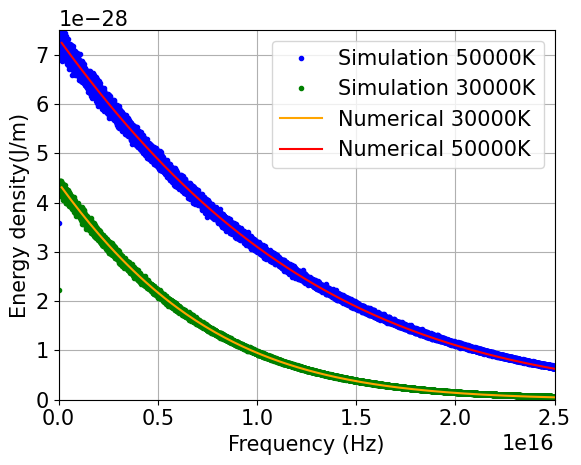

In [32]:
import matplotlib.pyplot as plt
M=2**21
tsim=7e-12
eps0 = 8.854187e-12
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12
deltap = np.sqrt(1/3/eps0/hbar/c)*kb
T=30000
limit=1000
frequency_limit = np.linspace(0, 25, limit)
frequency = frequency_limit*10**15
omega = frequency*np.pi*2
def D(omega,T):
    return(hbar*omega/np.pi/c/(np.exp(hdk*omega/T)-1))
Efavg = data['Efavg_50000']
Efavg1 = data['Efavg_30000']
freqs = np.linspace(0,2*2**22*np.pi/(7*1e-12),2**22)
plt.rcParams.update({'font.size': 15})
plt.plot(freqs,Efavg*tsim*eps0*4*np.pi*3/M*2.75e4,'b''.',label='Simulation 50000K')
plt.plot(freqs,Efavg1*tsim*eps0*4*np.pi*3/M*2.75e4,'g''.',label='Simulation 30000K')
plt.plot(omega,D(omega,30000),'orange',label='Numerical 30000K')
plt.plot(omega,D(omega,50000),'red',label='Numerical 50000K')
plt.xlim(0,25e15)
plt.ylim(0,7.5e-28)
plt.grid()
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy density(J/m)')
plt.savefig('3_50000.png')
plt.show()


In [1]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('3000K_1.5_4.5e14.png','new3000K_1.5_4.5e14.png')